In [6]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print (train_data.shape)
print (train_labels.shape)

(25000,)
(25000,)


In [7]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [9]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[12000]]
)
decoded_review

"? i suppose it's nice and trendy to see wonderful things in the absolute ? of a film like this with the sometimes pointless ? of many hollywood films we can relax and enjoy a scene devoid of explosions foul language and corny one liners ? has its place and can be very effective when employed properly however this film is not one of those cases br br take the long scenes with no dialogue and dreary sparse scenery i'm sure that they must hold some great meaning and insight because the implied message in ? in ? the acting is poor bland and pedestrian and features one of the worst crying scenes in history at the end of the film if you can sit through it to the end the scenery is drab and the ridiculously long ending sequence of the girl walking through the ? park is as ? as having a tooth pulled i would call this ? but as the film didn't build to any sort of climax whatsoever not even in the erotic scenes it would be untrue i'm sure that there was a script employed during the filming but 

In [19]:
# encode sequences into binary matrix (1 on for word found in review)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train.shape)
print(x_test.shape)
print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_test.shape)
print(y_train[0])


(25000, 10000)
(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]
(25000,)
(25000,)
1.0


In [20]:
# model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 391us/step - loss: 0.5072 - accuracy: 0.7819 - val_loss: 0.3770 - val_accuracy: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2973 - accuracy: 0.9042 - val_loss: 0.3245 - val_accuracy: 0.8692
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2182 - accuracy: 0.9277 - val_loss: 0.2854 - val_accuracy: 0.8870
Epoch 4/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1751 - accuracy: 0.9411 - val_loss: 0.2735 - val_accuracy: 0.8920
Epoch 5/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1425 - accuracy: 0.9549 - val_loss: 0.2842 - val_accuracy: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1194 - accuracy: 0.9626 - val_loss: 0.2966 - val_accuracy: 0.8846
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

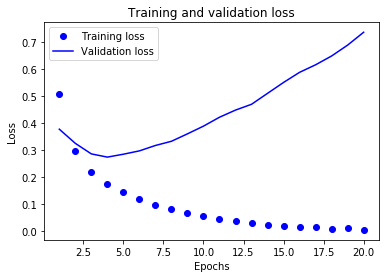

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


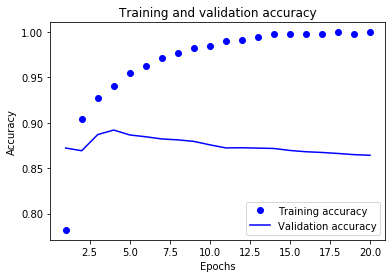

In [34]:
plt.clf()

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [35]:
# peak accuracy around 4 epochs

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 7s 447us/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.7640 - val_accuracy: 0.8642
Epoch 2/4
15000/15000 [==============================] - 3s 173us/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.7856 - val_accuracy: 0.8643
Epoch 3/4
15000/15000 [==============================] - 3s 169us/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.8394 - val_accuracy: 0.8619
Epoch 4/4
15000/15000 [==============================] - 3s 186us/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.8549 - val_accuracy: 0.8634


In [40]:
# evaluate against test

results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

25000/25000 [==============================] - 3s 129us/step
[0.9405657851290703, 0.8469600081443787]
['loss', 'accuracy']
